In [1]:
import sys
from pathlib import Path

# Project root (one level ABOVE src)
PROJ_ROOT = Path(r"C:\Users\quantbase\Desktop\SyStrat_factmod")

if str(PROJ_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJ_ROOT))

print("Project root on sys.path:", PROJ_ROOT in map(Path, map(str, sys.path)))

from src.fm_config import DATA_INT
print("DATA_INT =", DATA_INT)


Project root on sys.path: True
DATA_INT = C:\Users\quantbase\Desktop\SyStrat_factmod\data_int


In [3]:
import pandas as pd          # already in env — no new install
import numpy as np           # already in env — no new install
import matplotlib.pyplot as plt  # already in env — no new install

from src.fm_config import DATA_INT   # no installation needed

# --- load factor returns ---
fac_path = DATA_INT / "factor_returns_us.parquet"
fac = pd.read_parquet(fac_path)


# Load the factor returns we saved from fm_factor_model_us
fac_ret_us = pd.read_parquet(DATA_INT / "factor_returns_us.parquet")


# ensure DatetimeIndex
fac.index = pd.to_datetime(fac.index)
fac.index.name = "date"

# style-only slice (exclude market / sector_all)
STYLE_COLS = ["SIZE", "VAL", "MOM", "QUAL", "EMA20_GAP", "VOL_Z", "LIQ"]
fac_style = fac[STYLE_COLS].copy()

In [4]:
# Optional: quick sanity check
print(fac_ret_us.columns)
fac_ret_us.head()

Index(['market', 'sector_Communication Services',
       'sector_Consumer Discretionary', 'sector_Consumer Staples',
       'sector_Energy', 'sector_Financials', 'sector_Health Care',
       'sector_Industrials', 'sector_Information Technology',
       'sector_Materials', 'EMA20_GAP', 'LIQ', 'MOM', 'QUAL', 'SIZE', 'VAL',
       'VOL_Z'],
      dtype='object')


,market,sector_Communication Services,sector_Consumer Discretionary,sector_Consumer Staples,sector_Energy,sector_Financials,sector_Health Care,sector_Industrials,sector_Information Technology,sector_Materials,EMA20_GAP,LIQ,MOM,QUAL,SIZE,VAL,VOL_Z
date,,,,,,,,,,,,,,,,,
2021-11-02,0.001730,0.001861,-0.006513,0.003607,-0.011131,-0.014072,0.005852,-0.000519,0.008403,0.012513,0.004956,0.001394,0.001188,0.004257,0.000501,-0.002307,-0.006729
2021-11-03,0.004885,0.006107,0.011467,0.001578,-0.009858,-0.006224,0.002056,-0.004620,0.001815,-0.002321,0.003788,0.000185,-0.004937,-0.002133,0.002700,0.000287,0.002906
2021-11-04,0.007573,0.001382,0.009735,0.000330,-0.001522,0.002628,-0.003737,-0.011362,0.000710,0.001836,0.006075,0.001545,-0.007080,-0.000148,0.001171,-0.001204,0.003309
2021-11-05,0.005470,-0.002796,-0.004071,-0.004284,0.004646,0.017368,-0.016948,0.013672,-0.003595,-0.003992,0.001548,0.002584,-0.001303,-0.001083,0.000277,0.005134,-0.001106
2021-11-08,0.003165,-0.005304,-0.011729,-0.013222,0.004207,0.007482,0.001224,0.001348,0.002472,0.013522,0.005164,-0.002133,-0.005546,-0.000277,-0.000367,0.003518,0.005161


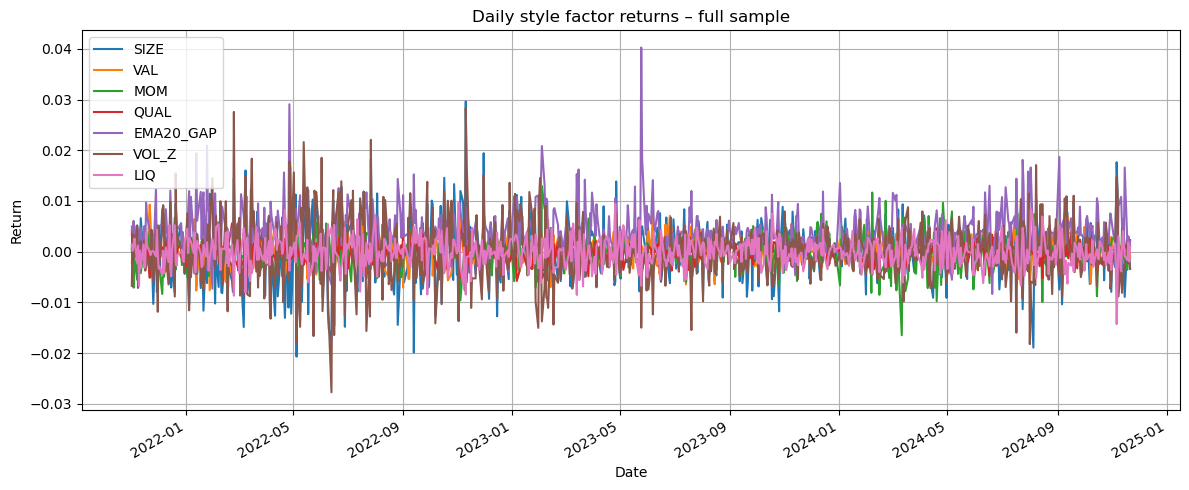

In [4]:
# 1. Plot daily factor returns (all style factors, full period)

plt.figure(figsize=(12, 5))
fac_style.plot(ax=plt.gca())
plt.title("Daily style factor returns – full sample")
plt.ylabel("Return")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()


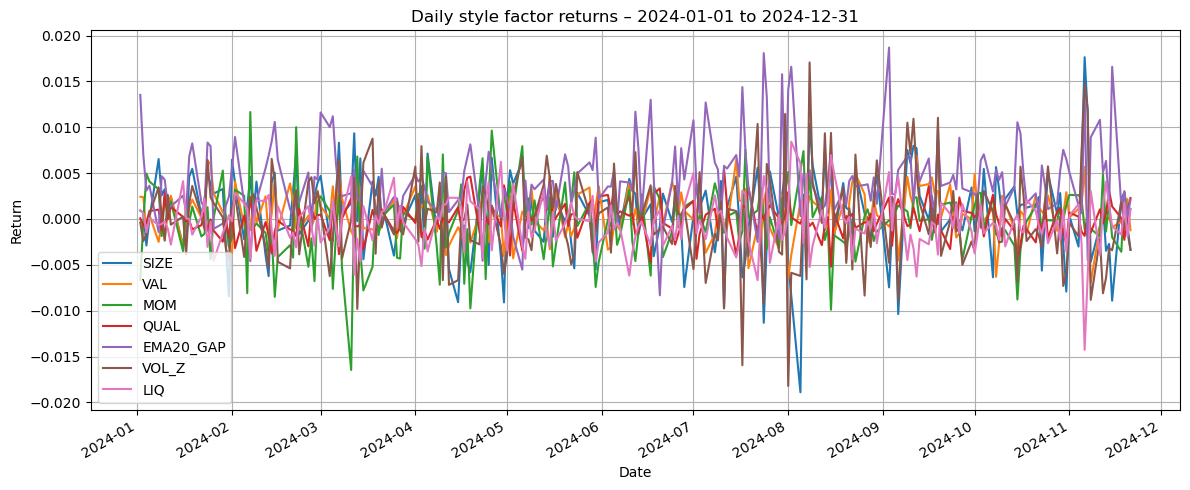

In [5]:
# 2. Plot daily factor returns over a specific window

# choose window
start = "2024-01-01"
end   = "2024-12-31"

fac_win = fac_style.loc[start:end]

plt.figure(figsize=(12, 5))
fac_win.plot(ax=plt.gca())
plt.title(f"Daily style factor returns – {start} to {end}")
plt.ylabel("Return")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()




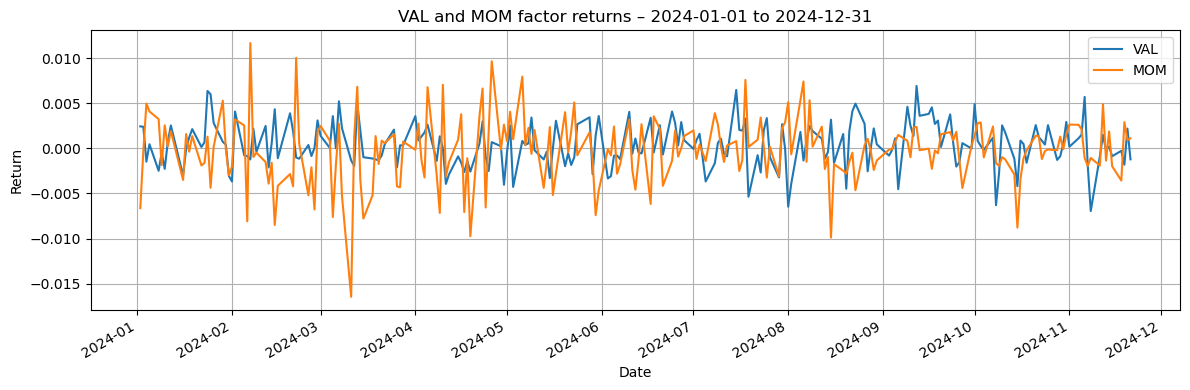

In [6]:
# Specific factor plot (e.g., VAL, MOM) over full period


subset_cols = ["VAL", "MOM"]
plt.figure(figsize=(12, 4))
fac_win[subset_cols].plot(ax=plt.gca())
plt.title(f"VAL and MOM factor returns – {start} to {end}")
plt.ylabel("Return")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()


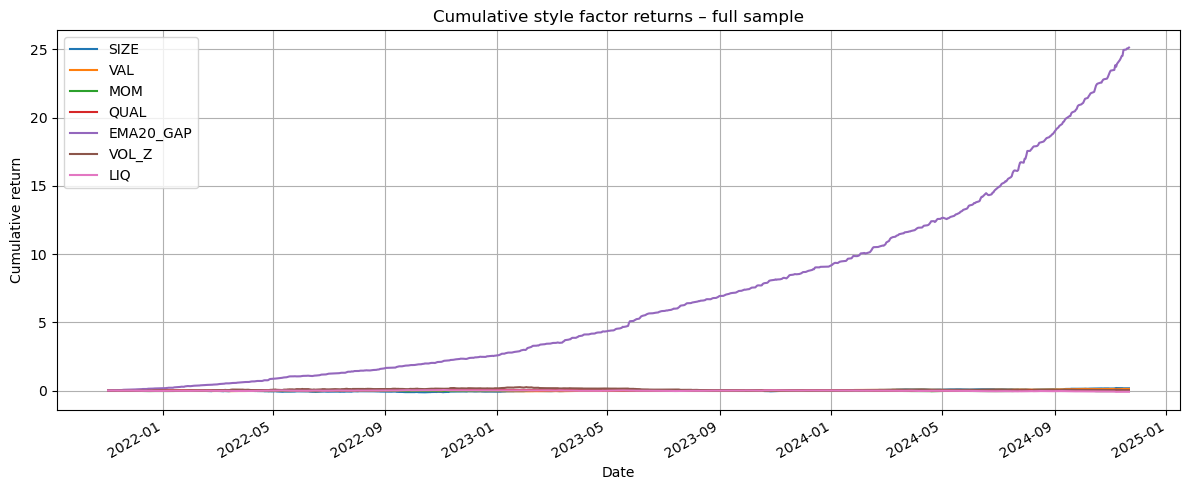

In [7]:
# 3. Plot cumulative factor returns (full period)

# treat daily factor return as simple return
cum_style = (1.0 + fac_style).cumprod() - 1.0

plt.figure(figsize=(12, 5))
cum_style.plot(ax=plt.gca())
plt.title("Cumulative style factor returns – full sample")
plt.ylabel("Cumulative return")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()



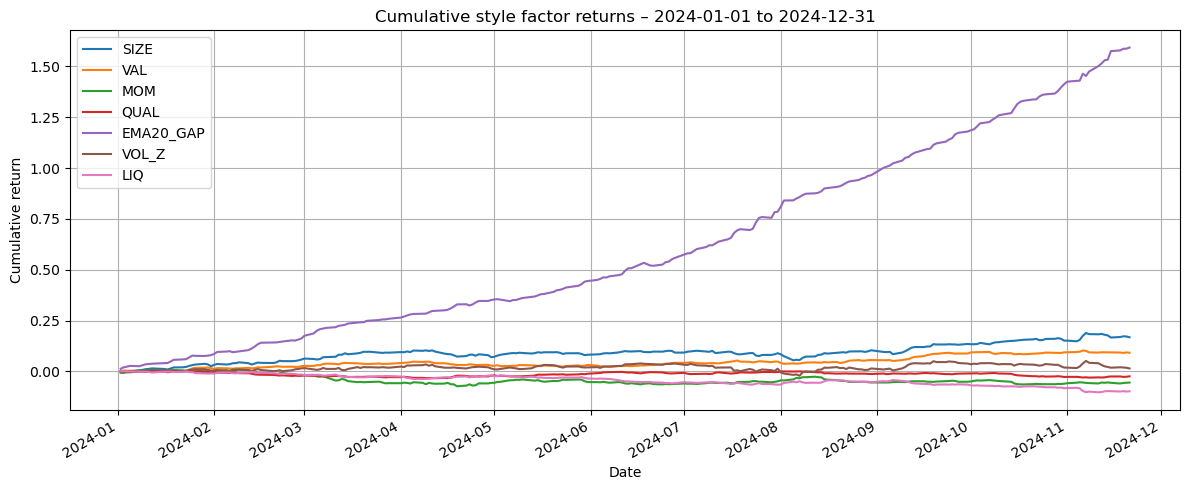

In [8]:
cum_win = (1.0 + fac_win).cumprod() - 1.0

plt.figure(figsize=(12, 5))
cum_win.plot(ax=plt.gca())
plt.title(f"Cumulative style factor returns – {start} to {end}")
plt.ylabel("Cumulative return")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()


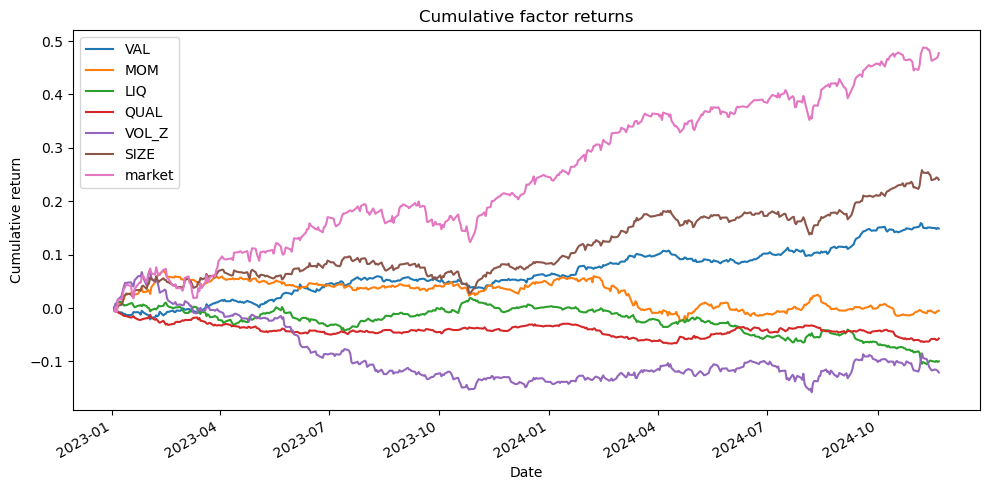

In [12]:
# plots for selected style factors


subset_cols = ["VAL", "MOM", "LIQ", "QUAL","VOL_Z","SIZE", "market"]
start = "2023-01-01"
end   = "2024-11-21"

fac_slice = fac_ret_us.loc[start:end, subset_cols]
fac_cum   = fac_slice.cumsum()

fig, ax = plt.subplots(figsize=(10, 5))
fac_cum.plot(ax=ax)

ax.set_title("Cumulative factor returns")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
plt.tight_layout()



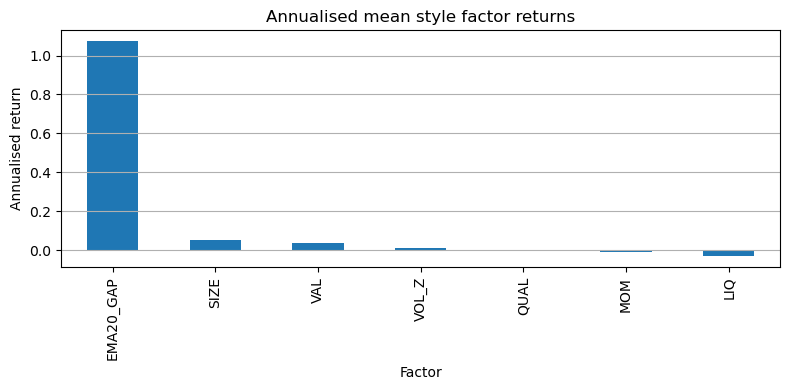

In [9]:
# 4. Bar chart of annualised mean factor returns

# assume ~252 trading days
ann_mean = fac_style.mean() * 252
ann_std  = fac_style.std() * np.sqrt(252)
ann_sharpe = ann_mean / ann_std

# sort by annualised mean
ann_mean_sorted = ann_mean.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
ann_mean_sorted.plot(kind="bar")
plt.title("Annualised mean style factor returns")
plt.ylabel("Annualised return")
plt.xlabel("Factor")
plt.grid(axis="y")
plt.tight_layout()


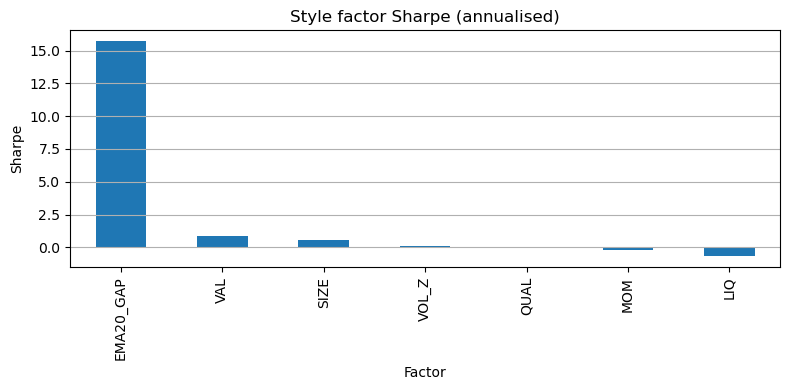

In [10]:
# Sharpe-style bar chart


sharpe_sorted = ann_sharpe.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sharpe_sorted.plot(kind="bar")
plt.title("Style factor Sharpe (annualised)")
plt.ylabel("Sharpe")
plt.xlabel("Factor")
plt.grid(axis="y")
plt.tight_layout()

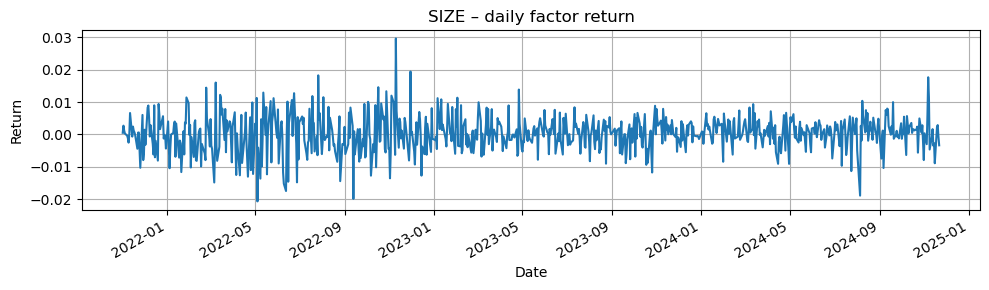

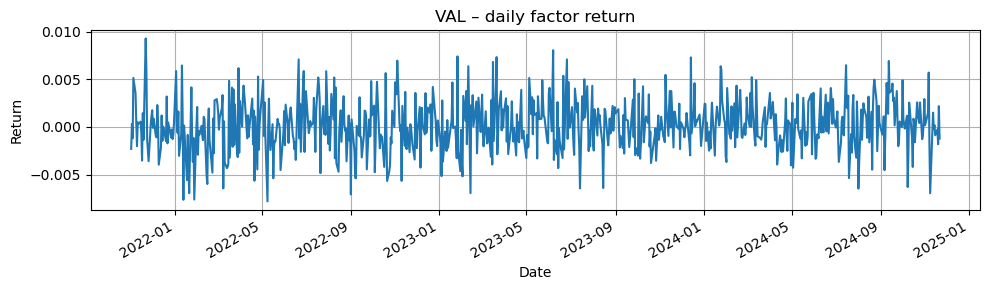

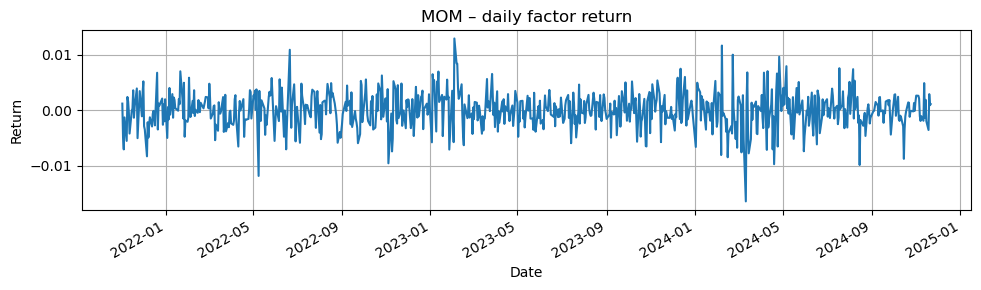

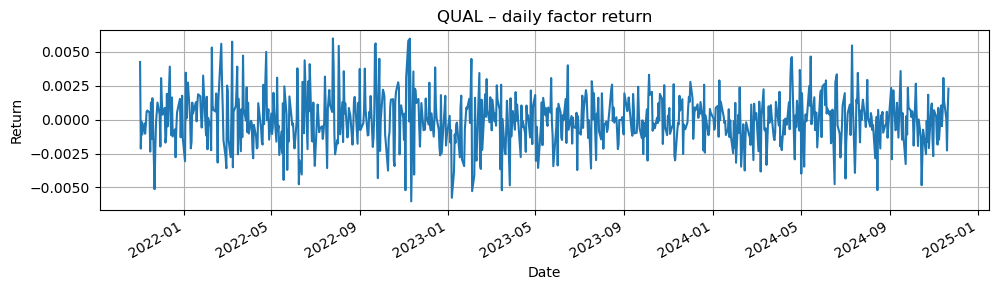

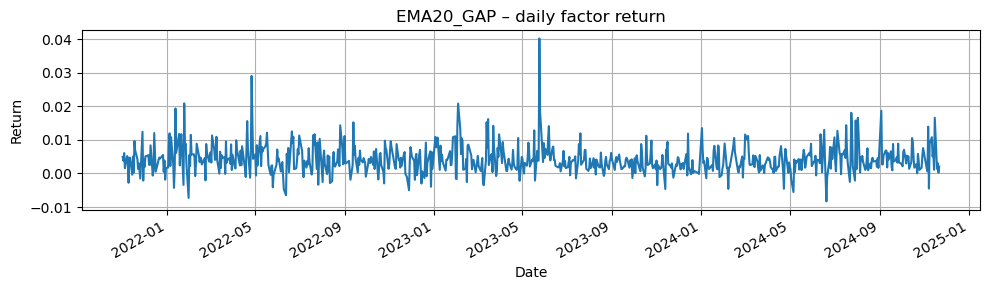

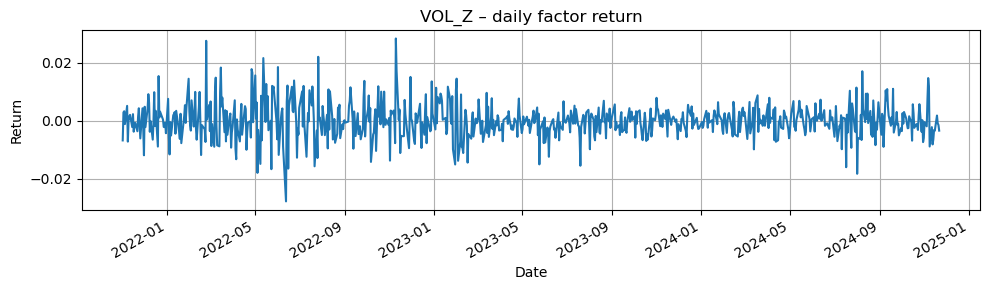

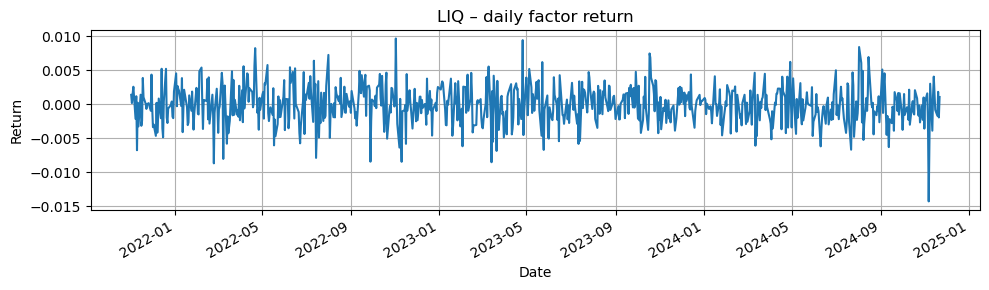

In [11]:
# 5. Single-factor zoom plots (one panel per factor)

for col in STYLE_COLS:
    plt.figure(figsize=(10, 3))
    fac_style[col].plot()
    plt.title(f"{col} – daily factor return")
    plt.ylabel("Return")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()

In [ ]:
#----------------------------------------------------------------------------------